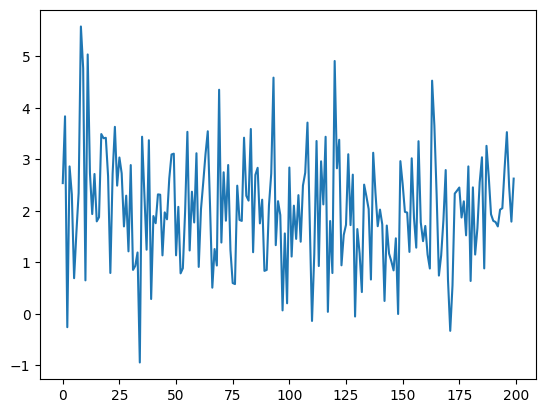

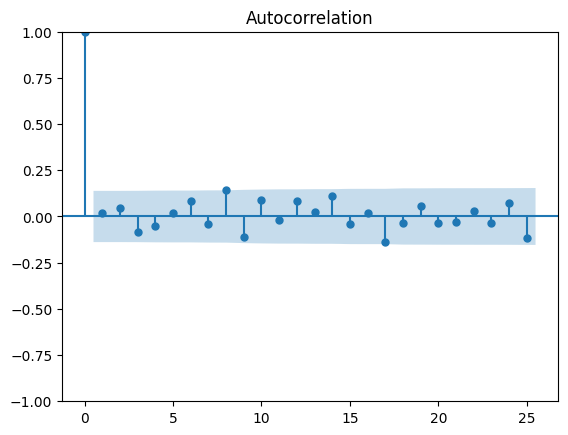

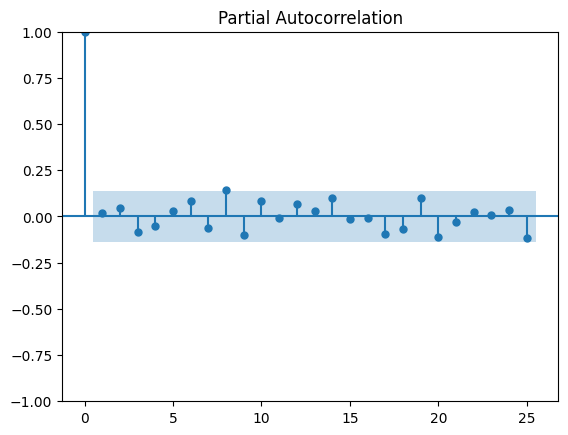

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv('Sessions2&3sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series1

num_lags=25 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()


In [7]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean 2.025175 Standard deviation 1.0855355749007032 Skewness 0.26035752481407104 Kurtosis 0.3437614921883654


In [8]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -13.767570036087875
p-value: 9.81926595182425e-26


C:\Users\santi\AppData\Local\Temp\ipykernel_356\103897038.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist = False, kde = True,


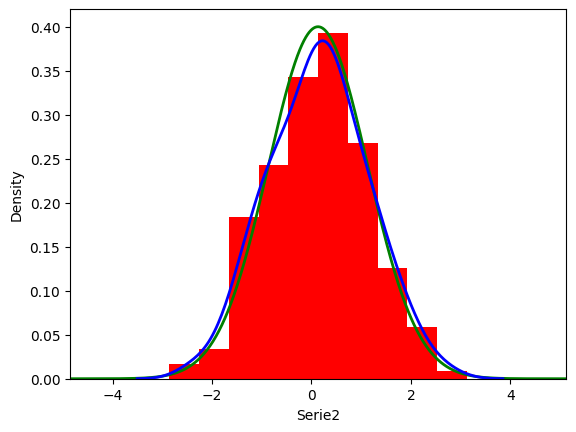

In [4]:
import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()




In [10]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(y, lags=[20])

print(box_test) # first output "The test statistic", second output "p-value"
# print("LjungBox", box_test) # first output "The test statistic", second output "p-value"
print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

Saphiro ShapiroResult(statistic=0.9913563132286072, pvalue=0.27926596999168396)
      lb_stat  lb_pvalue
20  23.258376   0.276287


KeyError: 0

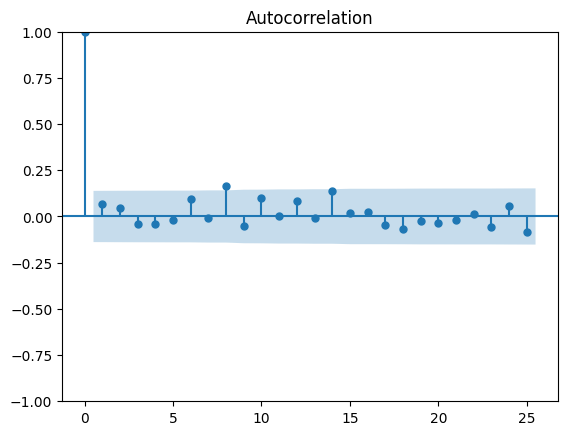

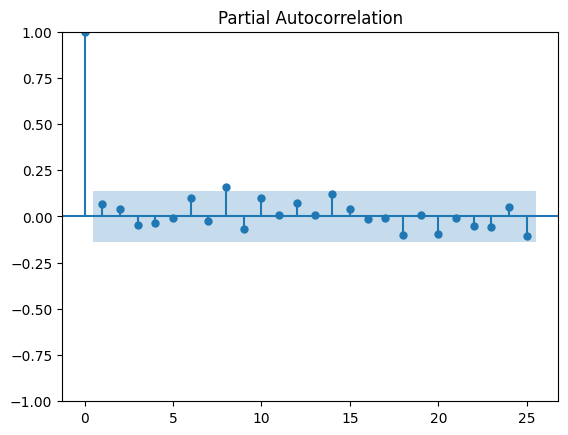

In [11]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [12]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
## print(box_test2)
print("Ljung-Box: Statistic value", box_test2[0], "p-value", box_test2[1]) 

KeyError: 0

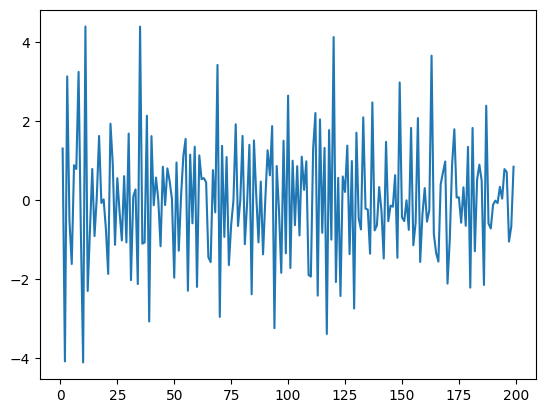

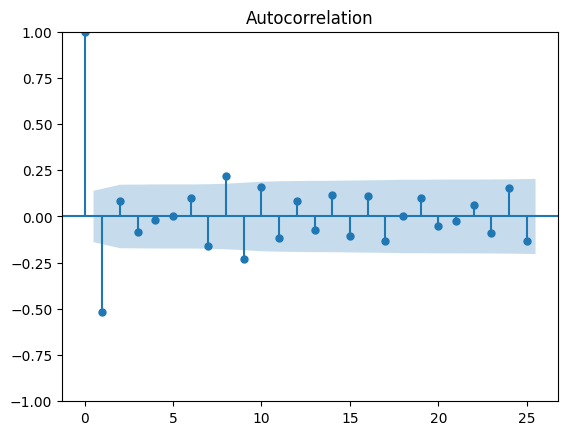

C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


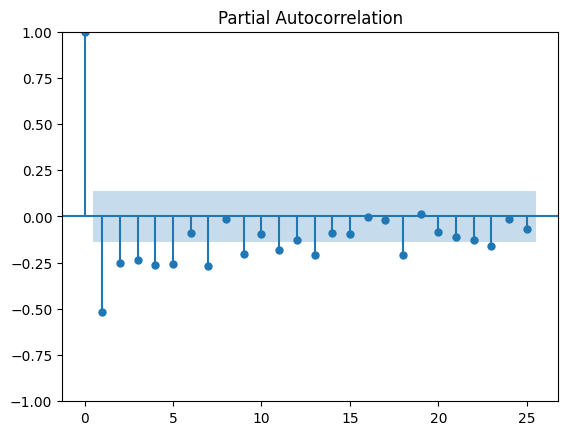

In [13]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [30]:
box_test_1 = sm.stats.acorr_ljungbox(z, lags=[20])
box_test_2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
#print("Box test z",box_test_1)
#print("Box test z**2",box_test_2)
print("Ljung-Box: Statistic value", box_test_1[0], "p-value", box_test_1[1]) 
print("Ljung-Box: Statistic value", box_test_2[0], "p-value", box_test_2[1]) 

Ljung-Box: Statistic value [55.63479696] p-value [3.29869457e-05]
Ljung-Box: Statistic value [17.51939712] p-value [0.61903503]


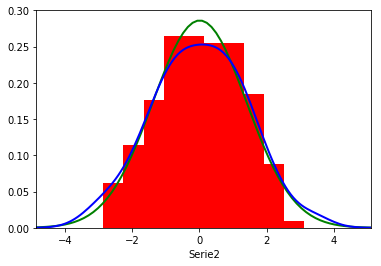

Saphiro ShapiroResult(statistic=0.9960854053497314, pvalue=0.8938466310501099)


In [31]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

# Analyzing the real time series

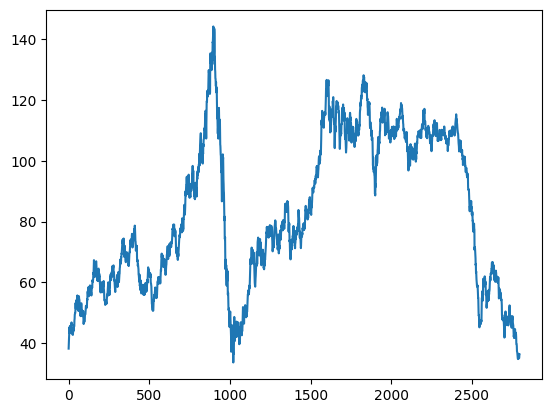

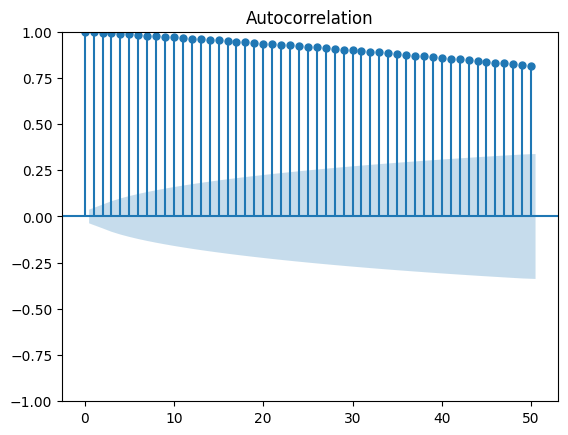

C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


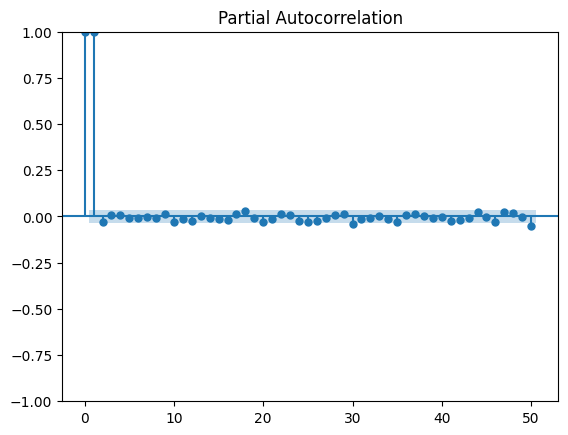

In [14]:
data = pd.read_csv("Sessions2&3real.csv", sep = ";", decimal = ",")
spot = data.iloc[:,0]
y = spot

num_lags=50

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_356\3506499943.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist = False, kde = True,


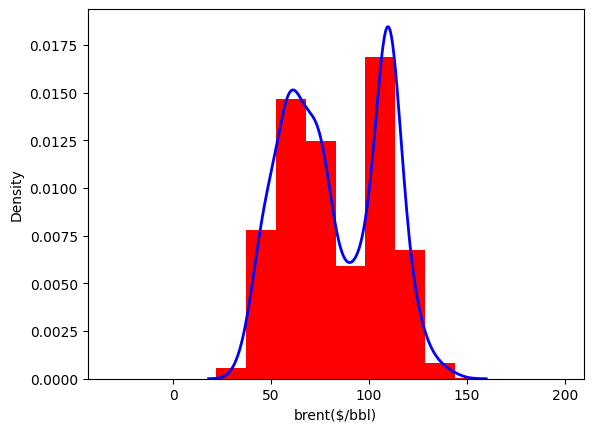

Saphiro ShapiroResult(statistic=0.9431536197662354, pvalue=1.5605605568253859e-31)
mean 82.88516446192348 std 25.300230244404094


In [15]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

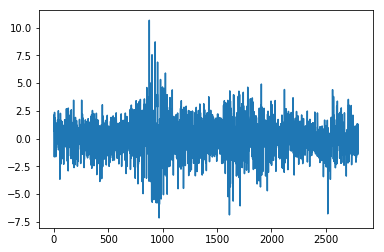

In [13]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
z = y.diff().dropna()

plt.plot(z)

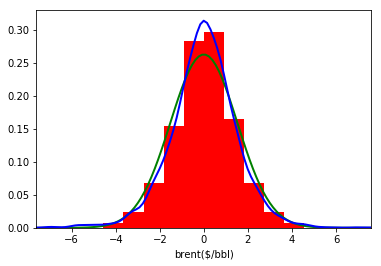

In [14]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

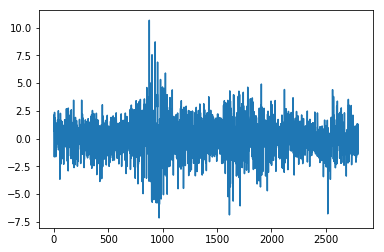

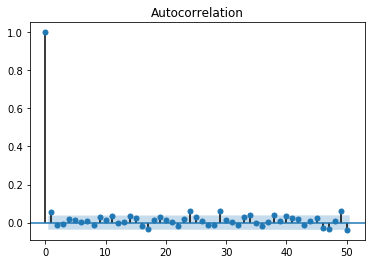

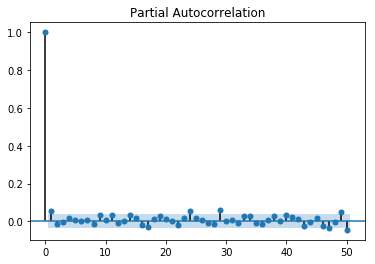

In [15]:
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [16]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])

#print("LjungBox", box_test) # first output "The test statistic", second output "p-value"
print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

Saphiro ShapiroResult(statistic=0.9763884544372559, pvalue=3.950486974169683e-21)
Ljung-Box: Statistic value [98.43674756] p-value [5.23986285e-05]


In [17]:

import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])

#print("LjungBox", box_test2) # first output "The test statistic", second output "p-value"
print("Ljung-Box: Statistic value", box_test2[0], "p-value", box_test2[1]) 

Ljung-Box: Statistic value [622.75948645] p-value [4.59241491e-119]


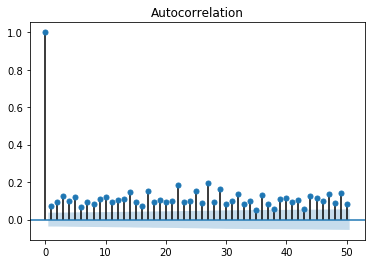

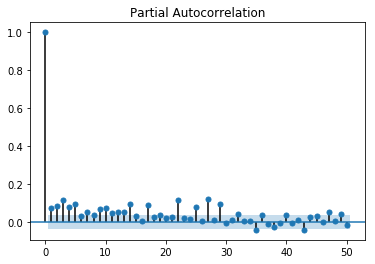

In [18]:
# plt.plot(z**2)
# plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()